In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
from meteostat import Point, Hourly
import plotly.express as px
import math
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(rc={'figure.figsize':(16,8.27)})
plt.rcParams.update({'font.size': 30})

In [2]:
meta_data = pd.read_csv("../data/pump_station_meta_data.csv", index_col=0)
columns=["DateTime", "Water_Height", "Power_P1", "Power_P2", "Outflow", "Effect_P2", "Effect_P1"]

In [3]:
def water_level_to_volume(water_level: pd.Series, pump):
    return water_level * (meta_data.loc[pump]["radius"]**2 * math.pi) * 1000

def minutes_to_date_timee(minutes: pd.Series, start_date: datetime):
    return pd.to_timedelta(minutes, unit='m')

In [4]:
# Read in the data PST
pump = "PST237"
year = "2021"
month = "August"

pump = pd.read_csv(f"../data/HistoricData/{pump}/{pump}_{year}_{month}.csv", encoding="cp1252", sep=";", decimal=",")
pump.columns = columns
pump["DateTime"] = pd.to_datetime(pump["DateTime"], format="%d-%m-%Y %H:%M:%S,%f")

In [5]:
pump["Volume"] = water_level_to_volume(pump["Water_Height"], "PST237")


In [7]:
pump

DateTime  Water_Height  Power_P1  Power_P2  Outflow  \
0     2021-08-01 00:00:00          0.65       0.0       0.0      0.0   
1     2021-08-01 00:00:30          0.67       0.0       0.0      0.0   
2     2021-08-01 00:01:00          0.68       0.0       0.0      0.0   
3     2021-08-01 00:01:30          0.69       0.0       0.0      0.0   
4     2021-08-01 00:02:00          0.71       0.0       0.0      0.0   
...                   ...           ...       ...       ...      ...   
79811 2021-08-31 23:57:00          1.25       0.0       0.0      0.0   
79812 2021-08-31 23:57:30          1.27       0.0       0.0      0.0   
79813 2021-08-31 23:58:00          1.29       0.0       0.0      0.0   
79814 2021-08-31 23:58:30          1.31       0.0       0.0      0.0   
79815 2021-08-31 23:59:30          1.33       0.0       0.0      0.0   

       Effect_P2  Effect_P1       Volume  
0            0.0        0.0   640.382247  
1            0.0        0.0   660.086316  
2            0.0        0.0   669.938350  
3            0.0        0.0   679.790385  
4            0.0        0.0   699.494454  
...          ...        ...          ...  
79811        0.0        0.0  1231.504320  
79812        0.0        0.0  1251.208389  
79813        0.0        0.0  1270.912458  
79814        0.0        0.0  1290.616528  
79815        0.0        0.0  1310.320597  

[79816 rows x 8 columns]

# This dataset has two extra attributes
It does not seem to be relelevant what effect does here. 
P1 and P2 Show the same behaviour as in other pump stations

Text(0.5, 0, 'Time')

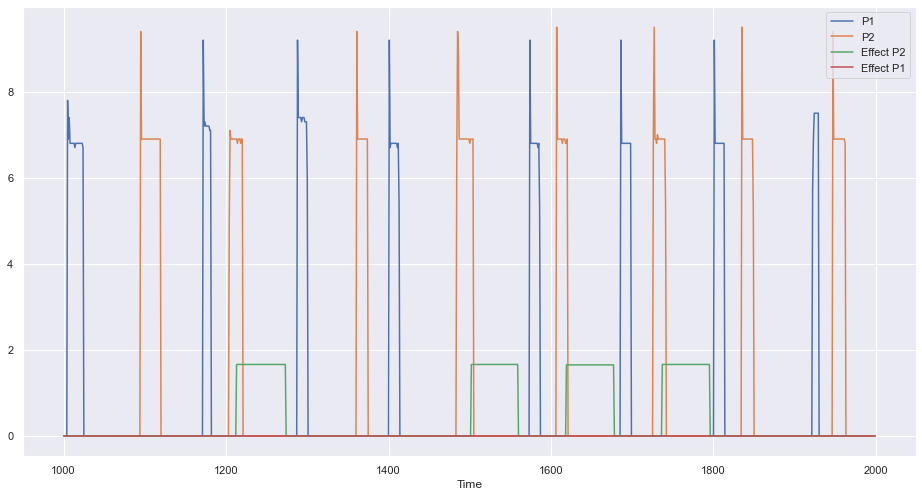

In [8]:
fig, ax = plt.subplots()
# PST237.Outflow[0:1000].plot(title="Outflow VS P1 Power VS P2 Power")
pump["Power_P1"][1000:2000].plot()
pump["Power_P2"][1000:2000].plot()
pump["Effect_P2"][1000:2000].plot()
pump["Effect_P1"][1000:2000].plot()
ax.legend(["P1", "P2", "Effect P2", "Effect P1"], loc="upper right")
ax.set_xlabel("Time")

# Does the pump run dry?
The outflow decreases while the pump is still running?

Text(0.5, 0, 'Time')

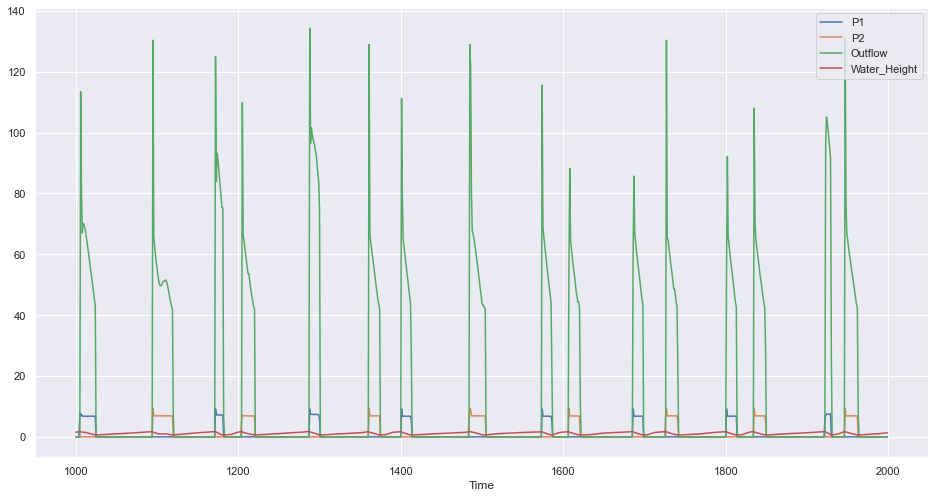

In [9]:
fig, ax = plt.subplots()
# PST237.Outflow[0:1000].plot(title="Outflow VS P1 Power VS P2 Power")
pump["Power_P1"][1000:2000].plot()
pump["Power_P2"][1000:2000].plot()
pump["Outflow"][1000:2000].plot()
pump["Water_Height"][1000:2000].plot()
# PST237["Effect_P2"][1000:2000].plot()
ax.legend(["P1", "P2", "Outflow","Water_Height"], loc="upper right")
ax.set_xlabel("Time")

# Water Height and Outflow looks alright. 

Text(0.5, 0, 'Time')

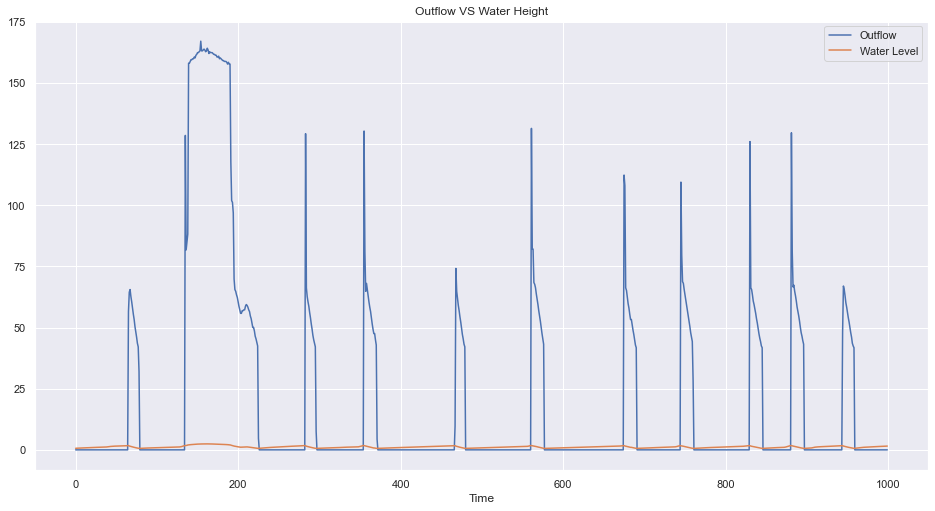

In [10]:
fig, ax = plt.subplots()
pump.Outflow[0:1000].plot(title="Outflow VS Water Height")
pump.Water_Height[0:1000].plot()
ax.legend(["Outflow", "Water Level"], loc="upper right")
ax.set_xlabel("Time")


In [11]:
profile = ProfileReport(pump, title="Pandas Profiling Report",  explorative=True)
profile.to_notebook_iframe()

Render HTML: 100%|██████████| 1/1 [00:01<00:00,  1.54s/it]


In [24]:
pump[(pump.Water_Height < 0.5) & (pump.Outflow > 0) ]

Empty DataFrame
Columns: [DateTime, Water_Height, Power_P1, Power_P2, Outflow, Effect_P2, Effect_P1, Volume]
Index: []